In [125]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Загрузка данных


In [126]:
# создаем лист с названием столбцов:

cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# используем Pandas read_csv():

dataset = pd.read_csv('heart.csv', names = cols)

dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')

# Преобразую для нормальных типов данных
dataset['RestingBP'] = pd.to_numeric(dataset['RestingBP'], errors='coerce')
dataset['Cholesterol'] = pd.to_numeric(dataset['Cholesterol'], errors='coerce')
dataset['FastingBS'] = pd.to_numeric(dataset['FastingBS'], errors='coerce')
dataset['MaxHR'] = pd.to_numeric(dataset['MaxHR'], errors='coerce')
dataset['Oldpeak'] = pd.to_numeric(dataset['Oldpeak'], errors='coerce')

# Анализ данных

In [127]:
# размер датасета, 150 записей, 5 столбцов

dataset.shape
dataset.dropna()
dataset.shape

(919, 12)

In [128]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,Sex,ChestPainType,NaN,NaN,NaN,RestingECG,NaN,ExerciseAngina,NaN,ST_Slope,HeartDisease
1,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
2,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
3,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
4,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
5,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
6,39.0,M,NAP,120.0,339.0,0.0,Normal,170.0,N,0.0,Up,0
7,45.0,F,ATA,130.0,237.0,0.0,Normal,170.0,N,0.0,Up,0
8,54.0,M,ATA,110.0,208.0,0.0,Normal,142.0,N,0.0,Up,0
9,37.0,M,ASY,140.0,207.0,0.0,Normal,130.0,Y,1.5,Flat,1


In [129]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             919 non-null    object 
 2   ChestPainType   919 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      919 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  919 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        919 non-null    object 
 11  HeartDisease    919 non-null    object 
dtypes: float64(6), object(6)
memory usage: 86.3+ KB


In [130]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [131]:
dataset['HeartDisease'].unique()

array(['HeartDisease', '0', '1'], dtype=object)

In [133]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410
HeartDisease,1


Видим, что набор данных почти сбалансированный.

# Визуализация данных

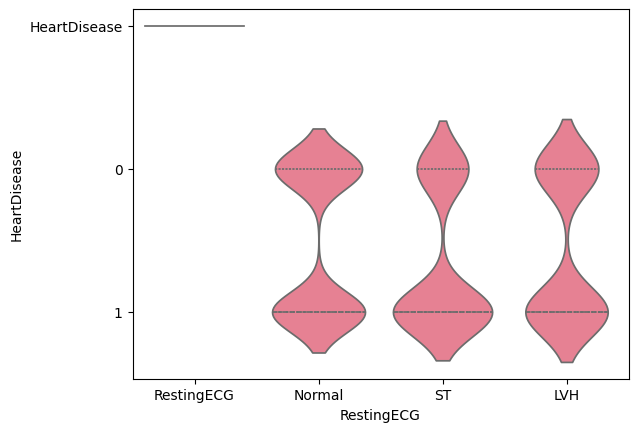

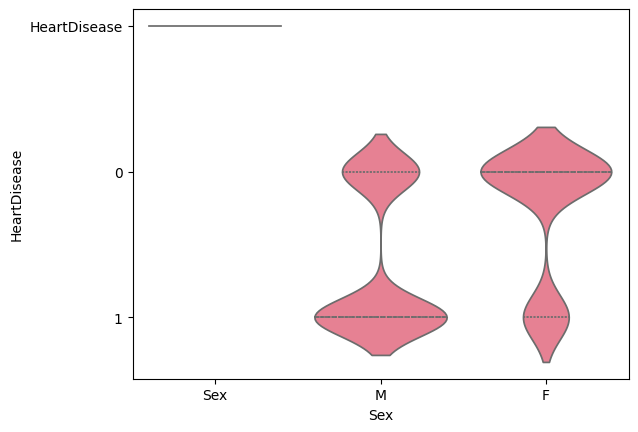

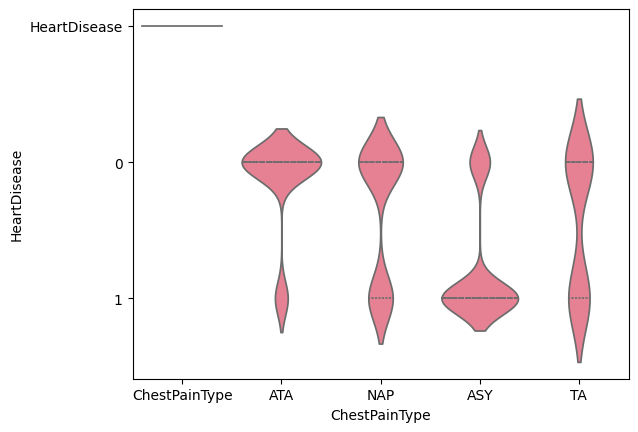

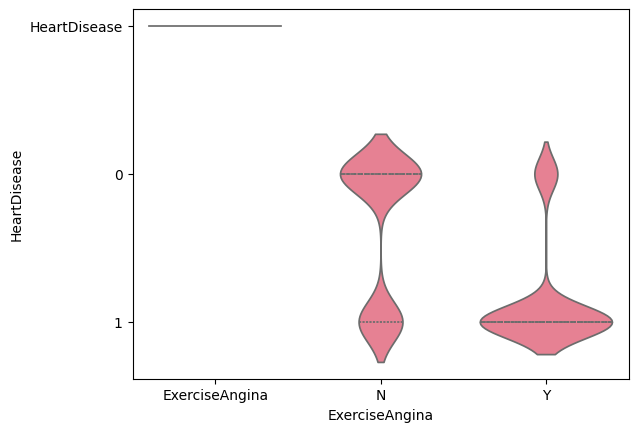

In [134]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='HeartDisease', x='RestingECG', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='HeartDisease', x='Sex', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='HeartDisease', x='ChestPainType', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='HeartDisease', x='ExerciseAngina', data=dataset, inner='quartile')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has

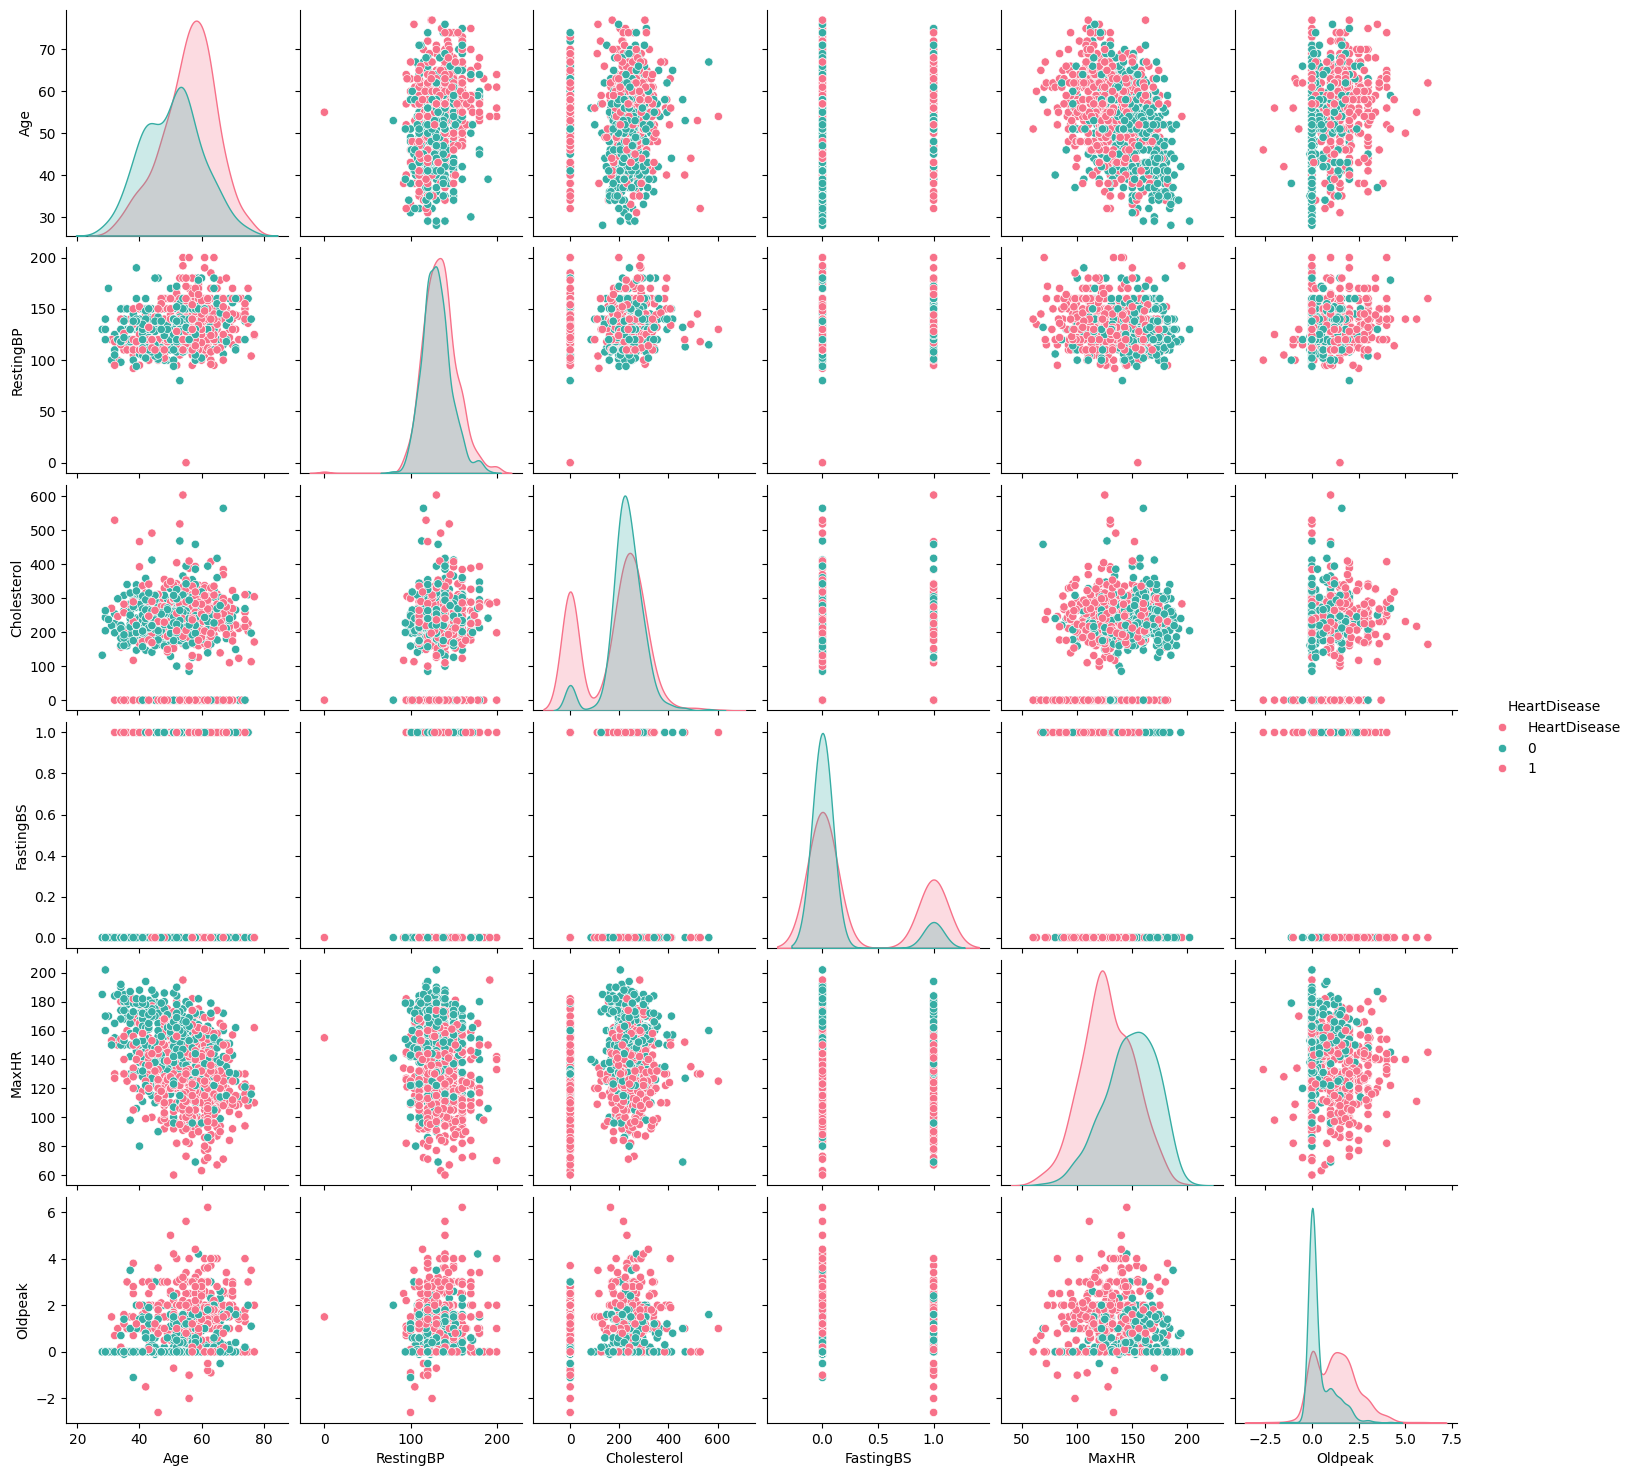

In [135]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:
colors = sns.color_palette("husl", 2)
sns.pairplot(dataset, hue='HeartDisease', palette=colors)
plt.show()

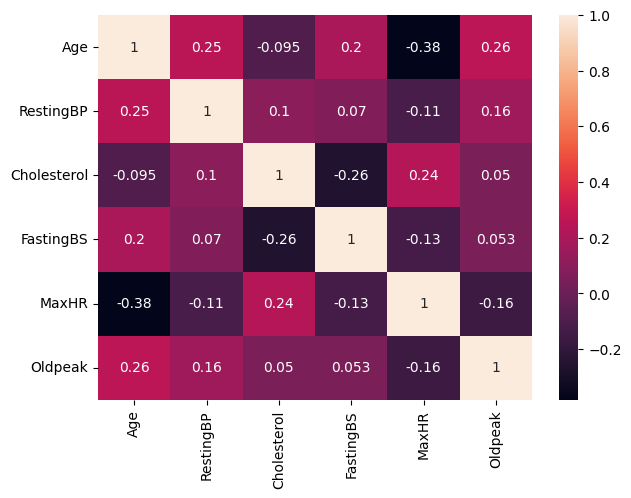

In [136]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Очень подробное и понятное описание возможностей построения графиков с помощью Matplotlib и Pandas с примерами кода можно найти здесь:

https://colab.research.google.com/drive/1ggUqm3C-Jk3dcMeibMW88FZLu7vtJ2k8?usp=sharing


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.


In [137]:
X = dataset.drop(['HeartDisease'], axis=1)
y = dataset['HeartDisease']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (919, 11) | y shape: (919,) 





## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [138]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [139]:
label_encoder = LabelEncoder()

X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['ChestPainType'] = label_encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = label_encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = label_encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = label_encoder.fit_transform(X['ST_Slope'])

y_mapped = y.map({'0': 0, '1': 1})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

print("NaN values in y_mapped:", y_mapped.isna().sum())

X_clean = X.dropna()
y_clean = y_mapped.dropna()

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.20, random_state=15, stratify=y_clean)
stats.ttest_ind (a=y_train, b=y_test)

# Размерность данных после разделения
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

NaN values in y_mapped: 1
X_train shape: (734, 11), y_train shape: (734,)
X_test shape: (184, 11), y_test shape: (184,)


## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [140]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.844687 (0.039521)
LDA: 0.846057 (0.035493)
KNN: 0.709904 (0.048332)
CART: 0.763051 (0.050475)
NB: 0.852906 (0.017592)
SVC: 0.562699 (0.007564)


Наивный Байесовский классификатор показал лучшие метрики среди всех алгоритмов.
Далее работаем с GaussianNB.


## Обучение конкретной модели
Определяем нашу модель GaussianNB
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [141]:
# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание на тренировочном наборе
y_pred_train = model.predict(X_train)

# Оценка точности на тренировочном наборе
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy on training set: {train_accuracy:.2f}')

Accuracy on training set: 0.86


## Визуализация решения

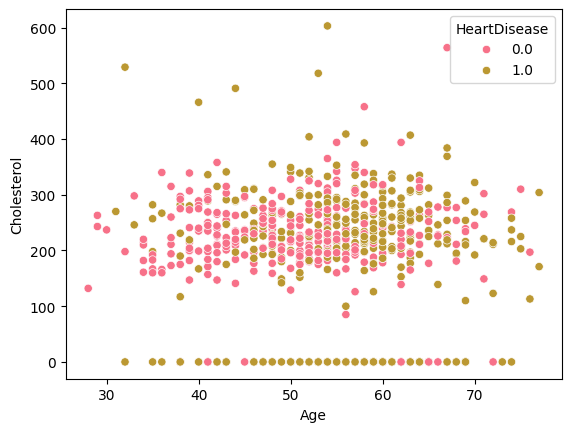

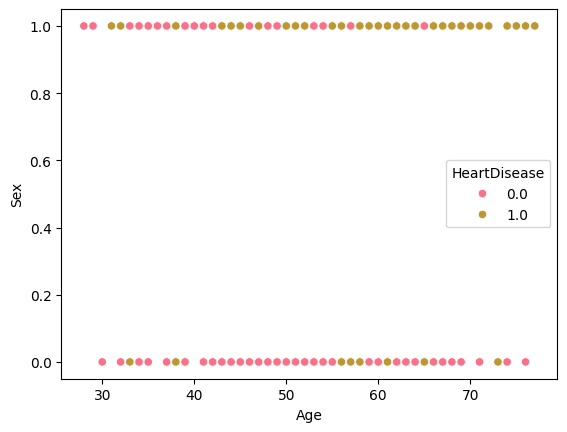

In [142]:
# Пример для двух признаков
sns.scatterplot(x='Age', y='Cholesterol', hue=y_train, data=X_train)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# 1 - мужики, 0 - женщины
sns.scatterplot(x='Age', y='Sex', hue=y_train, data=X_train)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

In [143]:
# Предсказание на ТЕСТОВОМ наборе
y_pred_test = model.predict(X_test)

# Оценка точности на ТЕСТОВОМ наборе
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on test set: {test_accuracy:.2f}')

print(classification_report(y_test, y_pred_test))

Accuracy on test set: 0.88
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86        82
         1.0       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

